In [1]:
import numpy as np
import mesa_reader as mr
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
h_1M = mr.MesaData('mesa_data/1M_pre_ms_to_wd/LOGS/history.data')

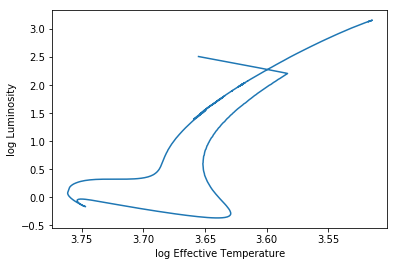

In [4]:
plt.plot(h_1M.log_Teff,h_1M.log_L)
plt.xlabel('log Effective Temperature')
plt.ylabel('log Luminosity')
plt.gca().invert_xaxis()

In [5]:
h_15M = mr.MesaData('mesa_data/15M_at_TAMS/LOGS/history.data')

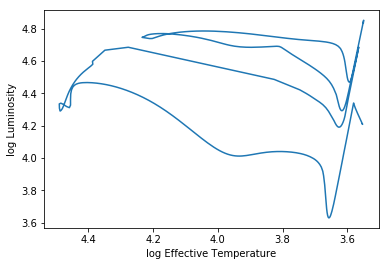

In [6]:
plt.plot(h_15M.log_Teff,h_15M.log_L)
plt.xlabel('log Effective Temperature')
plt.ylabel('log Luminosity')
plt.gca().invert_xaxis()

In [ ]:
import altair as alt
import pandas as pd

In [ ]:
df = pd.read_csv('http://www.astronexus.com/files/downloads/hygdata_v3.csv.gz')

In [ ]:
df